# Imersão de Dados 4 - Alura - Aulas

## Day 1

### Read dataset

In [ ]:
import pandas as pd

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)

In [5]:
data.shape

(10008, 8)

In [6]:
data.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000


In [7]:
# Get three random lines
data.sample(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6822,Rua Viena,Sacomã,São Paulo,132,3,2,2,R$ 880.000
4683,NaN,Santo Amaro,São Paulo,140,3,3,2,R$ 1.100.000
794,Rua Feliciano Maia,Jardim Paulista,São Paulo,457,5,5,8,R$ 35.000\n /Mês


### Get dataset info

In [8]:
type(data["Rua"])

pandas.core.series.Series

In [9]:
# Some functions also work over the dataset columns
data["Rua"].sample(3)

3441              Rua Cláudio Rossi
8808                            NaN
3537    Avenida George Saville Dodd
Name: Rua, dtype: object

In [10]:
type(data["Rua"][0])

str

In [11]:
data["Rua"][0]

'Avenida Itacira, 255 '

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


### Dataset operations

Calculate the average property size

In [13]:
# Call columns through the [] operator is better to maintain the code pattern
data["Metragem"].mean()

442.30065947242207

Find properties in the Vila Mariana district

In [14]:
vilamariana = data["Bairro"] == "Vila Mariana"
vilamariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [15]:
# The result of this operation is also an dataset
vilamariana.head()

0    False
1    False
2    False
3    False
4    False
Name: Bairro, dtype: bool

In [16]:
# Are there properties in the Vila Mariana district? How many?
properties_vilamariana = sum(vilamariana)
(properties_vilamariana > 0, properties_vilamariana)

(True, 184)

In [17]:
# Get the list of properties in Vila Mariana
properties_vilamariana = data[vilamariana]
properties_vilamariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Calculate the average property size of the Vila Mariana district

In [18]:
properties_vilamariana["Metragem"].mean()

233.6195652173913

### Plotting charts

In [19]:
amount_properties_by_district = data["Bairro"].value_counts()
amount_properties_by_district

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

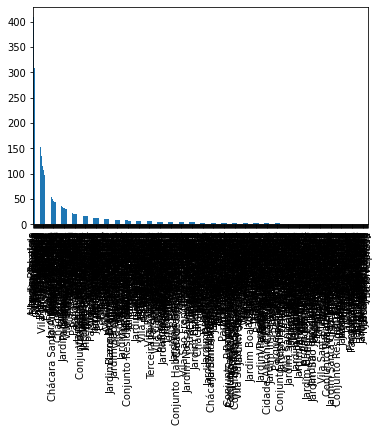

In [20]:
amount_properties_by_district.plot.bar()

Top 10 districts with the highest number of properties

In [21]:
# Top 10 charts
top10 = amount_properties_by_district.head(10)
top10

Alto de Pinheiros    409
Jardim Guedala       403
Jardim Paulista      309
Brooklin Paulista    247
Jardim Europa        240
Cidade Jardim        230
Vila Madalena        224
Pacaembu             222
Planalto Paulista    195
Jardim Leonor        186
Name: Bairro, dtype: int64

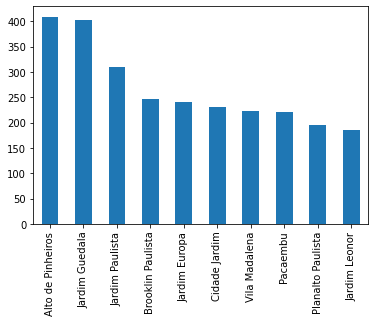

In [22]:
top10.plot.bar()

# Day 2

### Data Processing

The column "Valor" has the properties' prices represented as strings, with "R$" in prefix. Besides, some strings also indicates that the price refers to a rent ("/Dia" = daily, "/Mês" = month, "/Ano" = year).

In [23]:
data["Valor"][0]

'R$ 7.000.000'

In [24]:
data["Valor"][0].split()

['R$', '7.000.000']

In [25]:
data["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [26]:
data["Valor"].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [27]:
data["Valor"].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [28]:
data["Valor"].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Update the dataset to split column "Valor" data into three new columns.

In [29]:
data[["Moeda", "ValorAnuncio", "TipoAnuncio"]] = data["Valor"].str.split(expand=True)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [30]:
data["ValorAnuncio_float"] = data["ValorAnuncio"].str.replace(".", "").astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rua                 6574 non-null   object 
 1   Bairro              9996 non-null   object 
 2   Cidade              10008 non-null  object 
 3   Metragem            10008 non-null  int64  
 4   Quartos             10008 non-null  int64  
 5   Banheiros           10008 non-null  int64  
 6   Vagas               10008 non-null  int64  
 7   Valor               10008 non-null  object 
 8   Moeda               10008 non-null  object 
 9   ValorAnuncio        10008 non-null  object 
 10  TipoAnuncio         852 non-null    object 
 11  ValorAnuncio_float  10008 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 938.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [31]:
properties_to_sell = data[data["TipoAnuncio"].isnull()]
properties_to_sell.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0


In [32]:
properties_to_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rua                 6107 non-null   object 
 1   Bairro              9146 non-null   object 
 2   Cidade              9156 non-null   object 
 3   Metragem            9156 non-null   int64  
 4   Quartos             9156 non-null   int64  
 5   Banheiros           9156 non-null   int64  
 6   Vagas               9156 non-null   int64  
 7   Valor               9156 non-null   object 
 8   Moeda               9156 non-null   object 
 9   ValorAnuncio        9156 non-null   object 
 10  TipoAnuncio         0 non-null      object 
 11  ValorAnuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


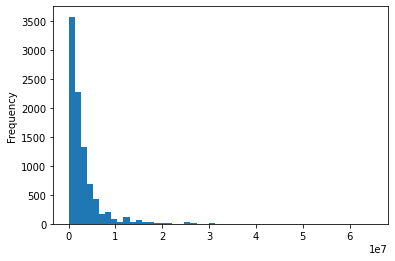

In [33]:
properties_to_sell["ValorAnuncio_float"].plot.hist(bins=50)

In [34]:
pd.set_option("display.precision", 2)

In [35]:
properties_to_sell.describe()

,Metragem,Quartos,Banheiros,Vagas,ValorAnuncio_float
count,9156.00,9156.00,9156.00,9156.00,9.16e+03
mean,434.42,3.45,3.80,3.96,3.05e+06
std,7856.42,1.05,1.97,2.60,3.94e+06
min,10.00,1.00,1.00,1.00,1.30e+04
25%,168.00,3.00,2.00,2.00,8.90e+05
50%,276.00,3.00,4.00,4.00,1.80e+06
75%,450.00,4.00,5.00,5.00,3.50e+06
max,750000.00,16.00,40.00,50.00,6.50e+07


In [36]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [37]:
properties_to_sell.describe()

,Metragem,Quartos,Banheiros,Vagas,ValorAnuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [38]:
properties_to_sell.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [39]:
properties_to_sell[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


### Plotting charts

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

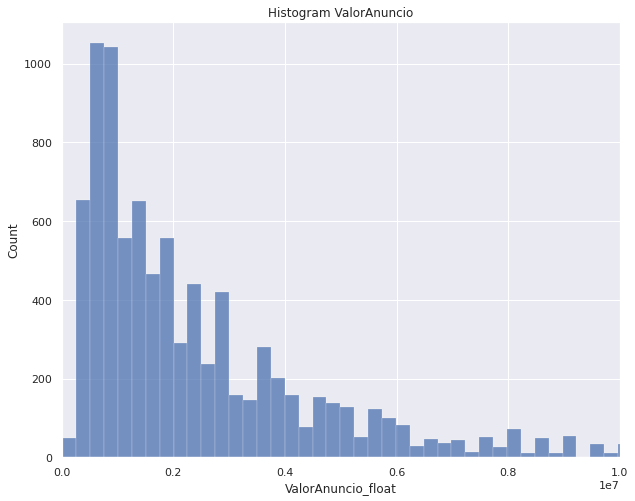

In [42]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=properties_to_sell, x="ValorAnuncio_float")
ax.set_title("Histogram ValorAnuncio")
plt.xlim(-50, 10000000)
plt.show()

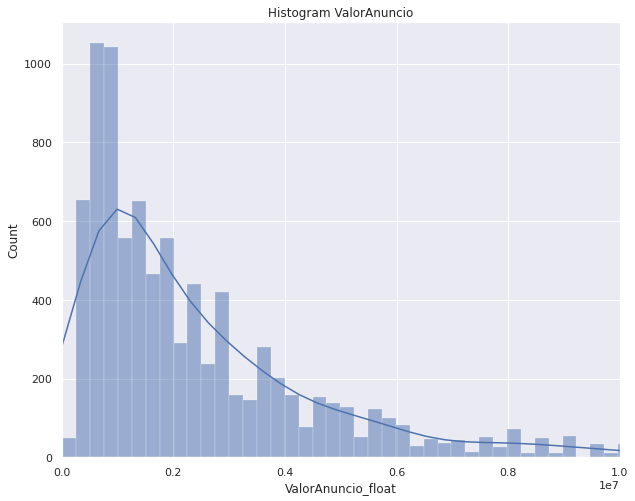

In [43]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=properties_to_sell, x="ValorAnuncio_float", kde=True)
ax.set_title("Histogram ValorAnuncio")
plt.xlim(-50, 10000000)
plt.show()